In [1]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("data/train.csv", index_col='id')
test_df = pd.read_csv('data/test.csv', index_col='id')

### Feature analysis

In [3]:
train_df.shape, test_df.shape

((20758, 17), (13840, 16))

In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [5]:
train_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
test_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [7]:
train_df = train_df.drop_duplicates()

In [8]:
train_df.shape

(20758, 17)

## EDA.


In [9]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
categorial_columns = train_df.select_dtypes(include=['object']).columns

### Количественные

In [10]:
train_df.describe()

Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.792022      0.008013      0.000000  
50%        2.000000      1.000000      0.573887  
75%        2.549617      1.587406      1.000000  
max        3.000000      3.000000      2.000000

In [11]:
test_df.describe()

Age        Height        Weight          FCVC           NCP  \
count  13840.000000  13840.000000  13840.000000  13840.000000  13840.000000   
mean      23.952740      1.698934     87.384504      2.442898      2.750610   
std        5.799814      0.088761     26.111819      0.531606      0.710927   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631662     65.000000      2.000000      3.000000   
50%       22.906342      1.700000     83.952968      2.358087      3.000000   
75%       26.000000      1.760710    111.157811      3.000000      3.000000   
max       61.000000      1.980000    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  13840.000000  13840.000000  13840.000000  
mean       2.032044      0.974532      0.611033  
std        0.611230      0.840361      0.608005  
min        1.000000      0.000000      0.000000  
25%        1.771781      0.001086      0.000000  
50%        2.000000      1.000000      0.552498  
75%        2.552388      1.571865      1.000000  
max        3.000000      3.000000      2.000000

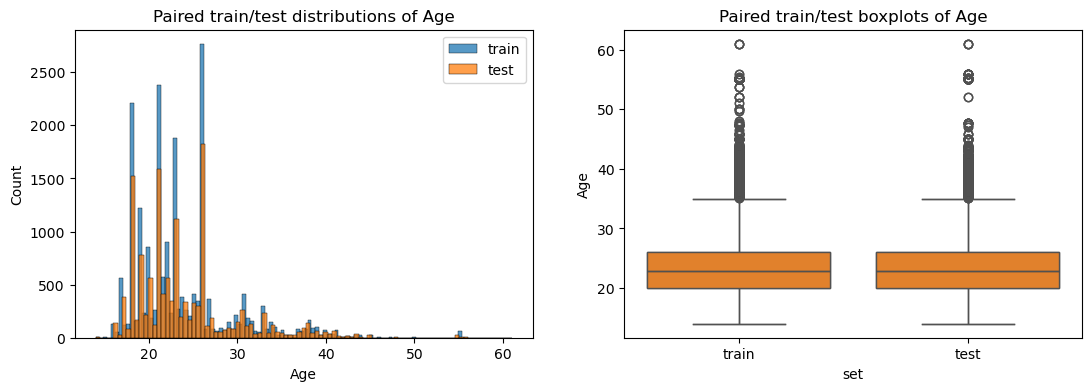

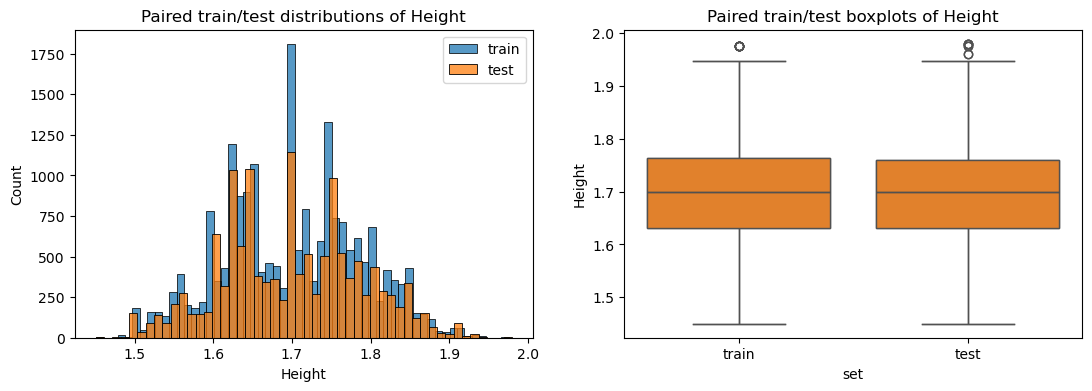

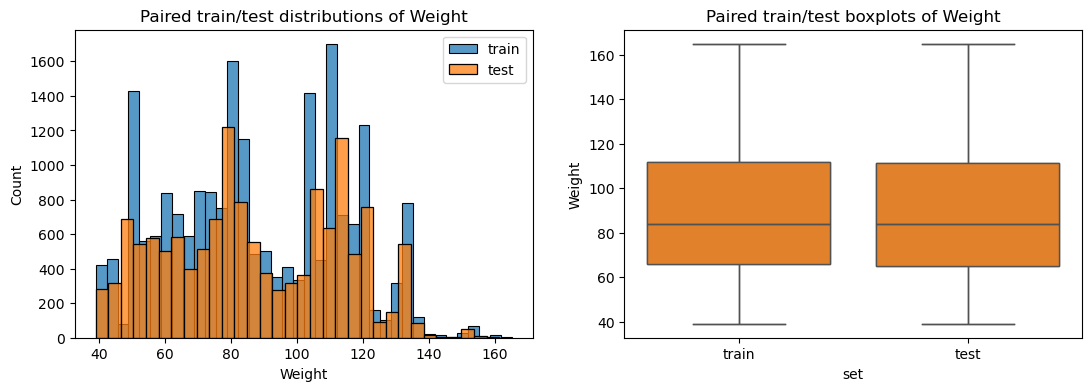

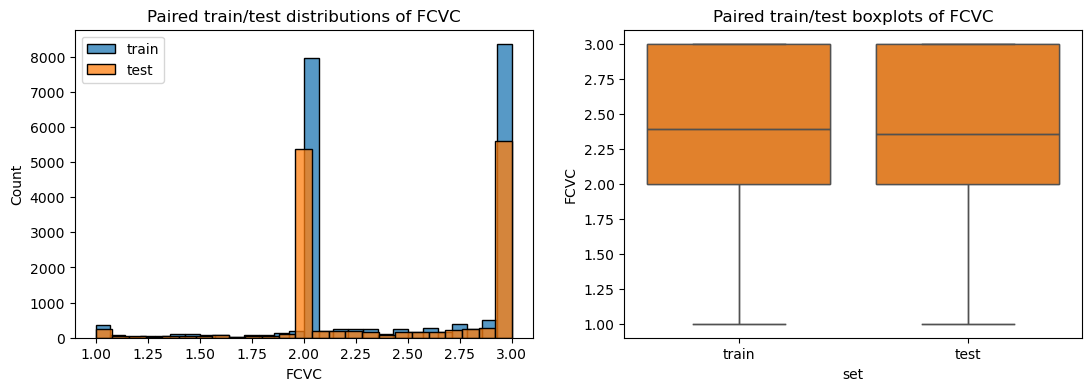

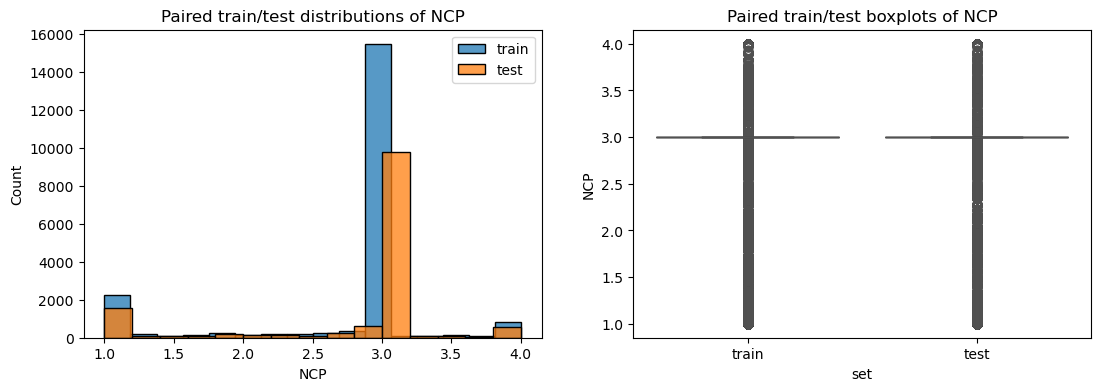

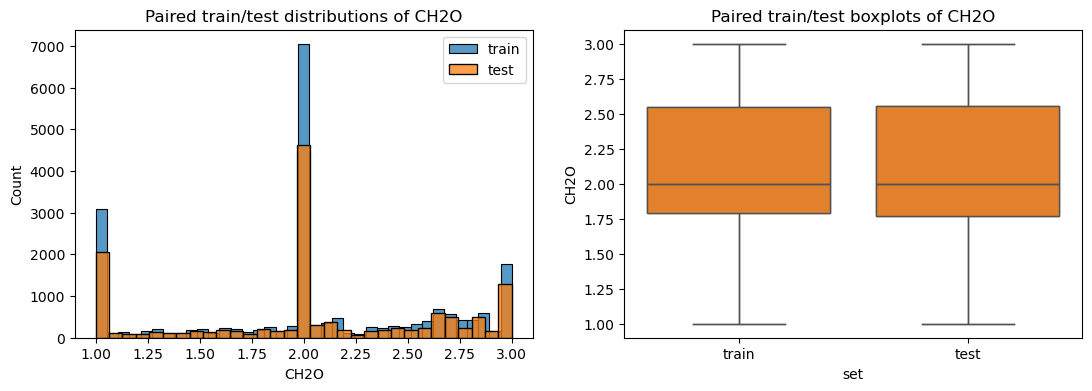

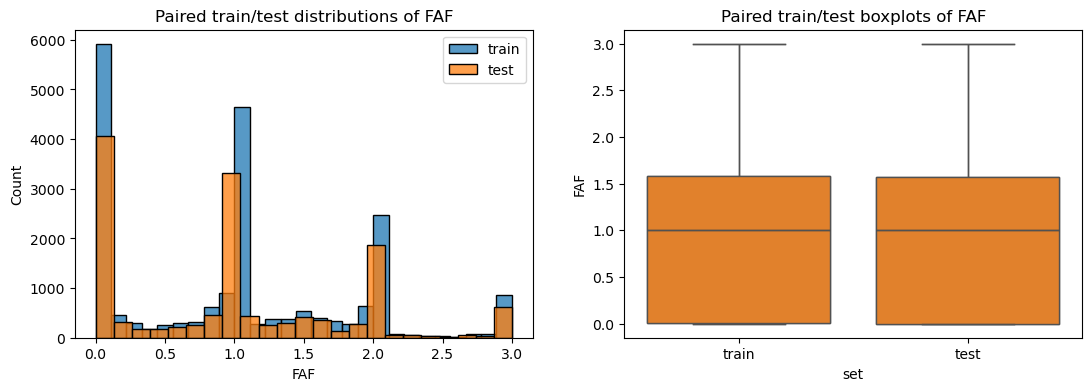

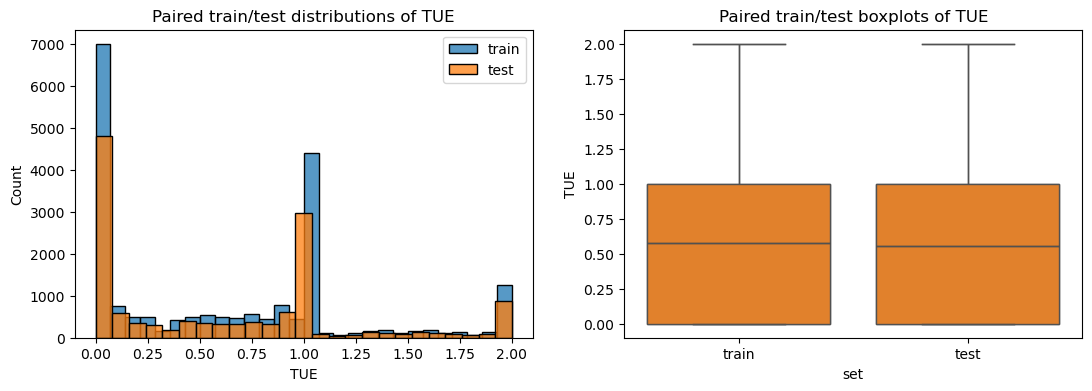

In [12]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    df = train.copy()
    df["set"] = "train"    
    df = pd.concat([df, test.copy()]).fillna("test")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(13,4))
    for i, s in enumerate(df[hue].unique()):
        selection = df.loc[df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g_hist = sns.histplot(selection, ax=ax[0], label=s)
            g_box = sns.boxplot(x=hue, y=feature, data=df, ax=ax[1])
    
    ax[0].set_title(f"Paired train/test distributions of {feature}")
    ax[1].set_title(f"Paired train/test boxplots of {feature}")
    
    g_hist.legend()
    plt.show()

for feature in numerical_columns:
    plot_distribution_pairs(train_df, test_df, feature)

Мы видим, что имеются выбросы в  age и в NCP.

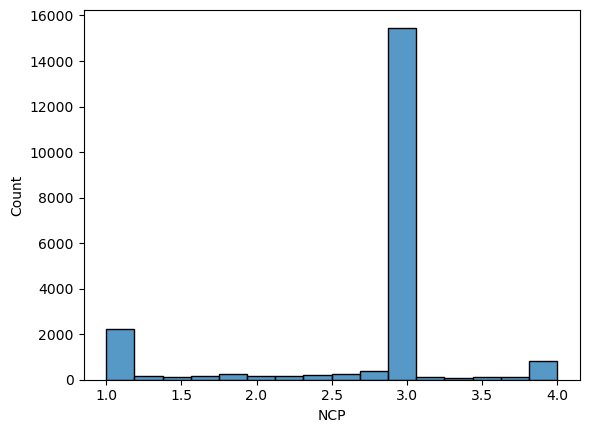

In [13]:
sns.histplot(train_df['NCP']);

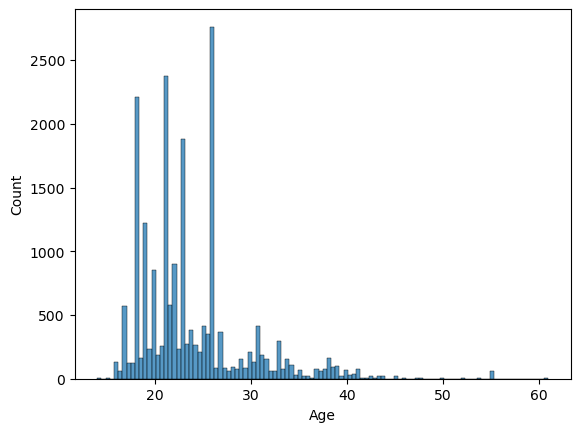

In [14]:
sns.histplot(train_df['Age']);

<Axes: xlabel='Age', ylabel='Count'>

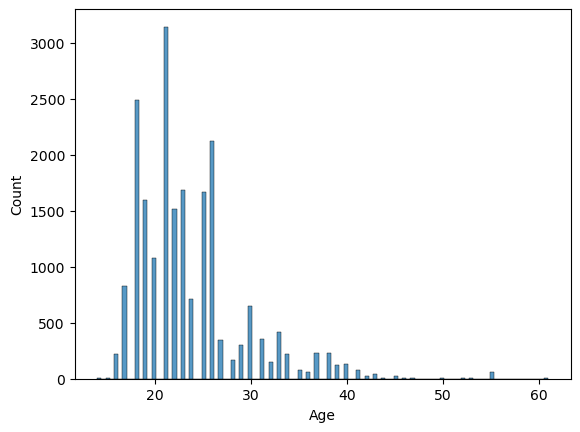

In [15]:
sns.histplot(train_df['Age'].astype("int64"))

<Axes: ylabel='Age'>

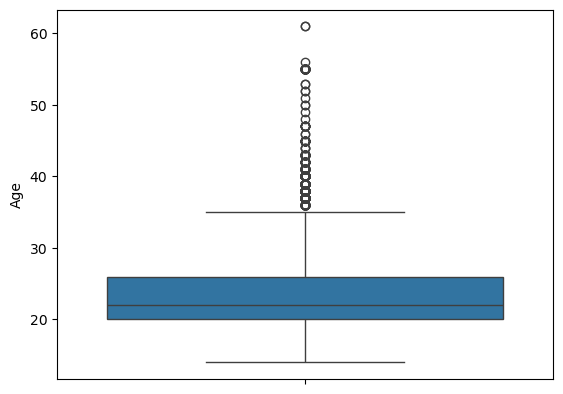

In [16]:
sns.boxplot(train_df['Age'].astype("int64"))

### Категориальные.

In [17]:
for feature in categorial_columns:
    print(f"{feature}: {train_df[feature].unique()}")
    if feature == "NObeyesdad": continue
    print(f"{feature}: {test_df[feature].unique()}")  

Gender: ['Male' 'Female']
Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
CAEC: ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: ['no' 'yes']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
CALC: ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


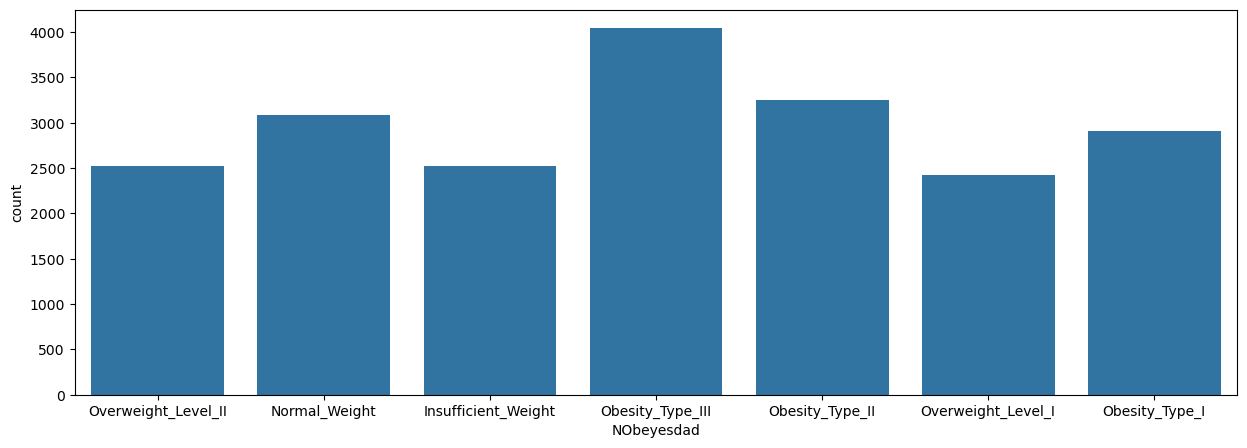

In [18]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(data=train_df, x='NObeyesdad');

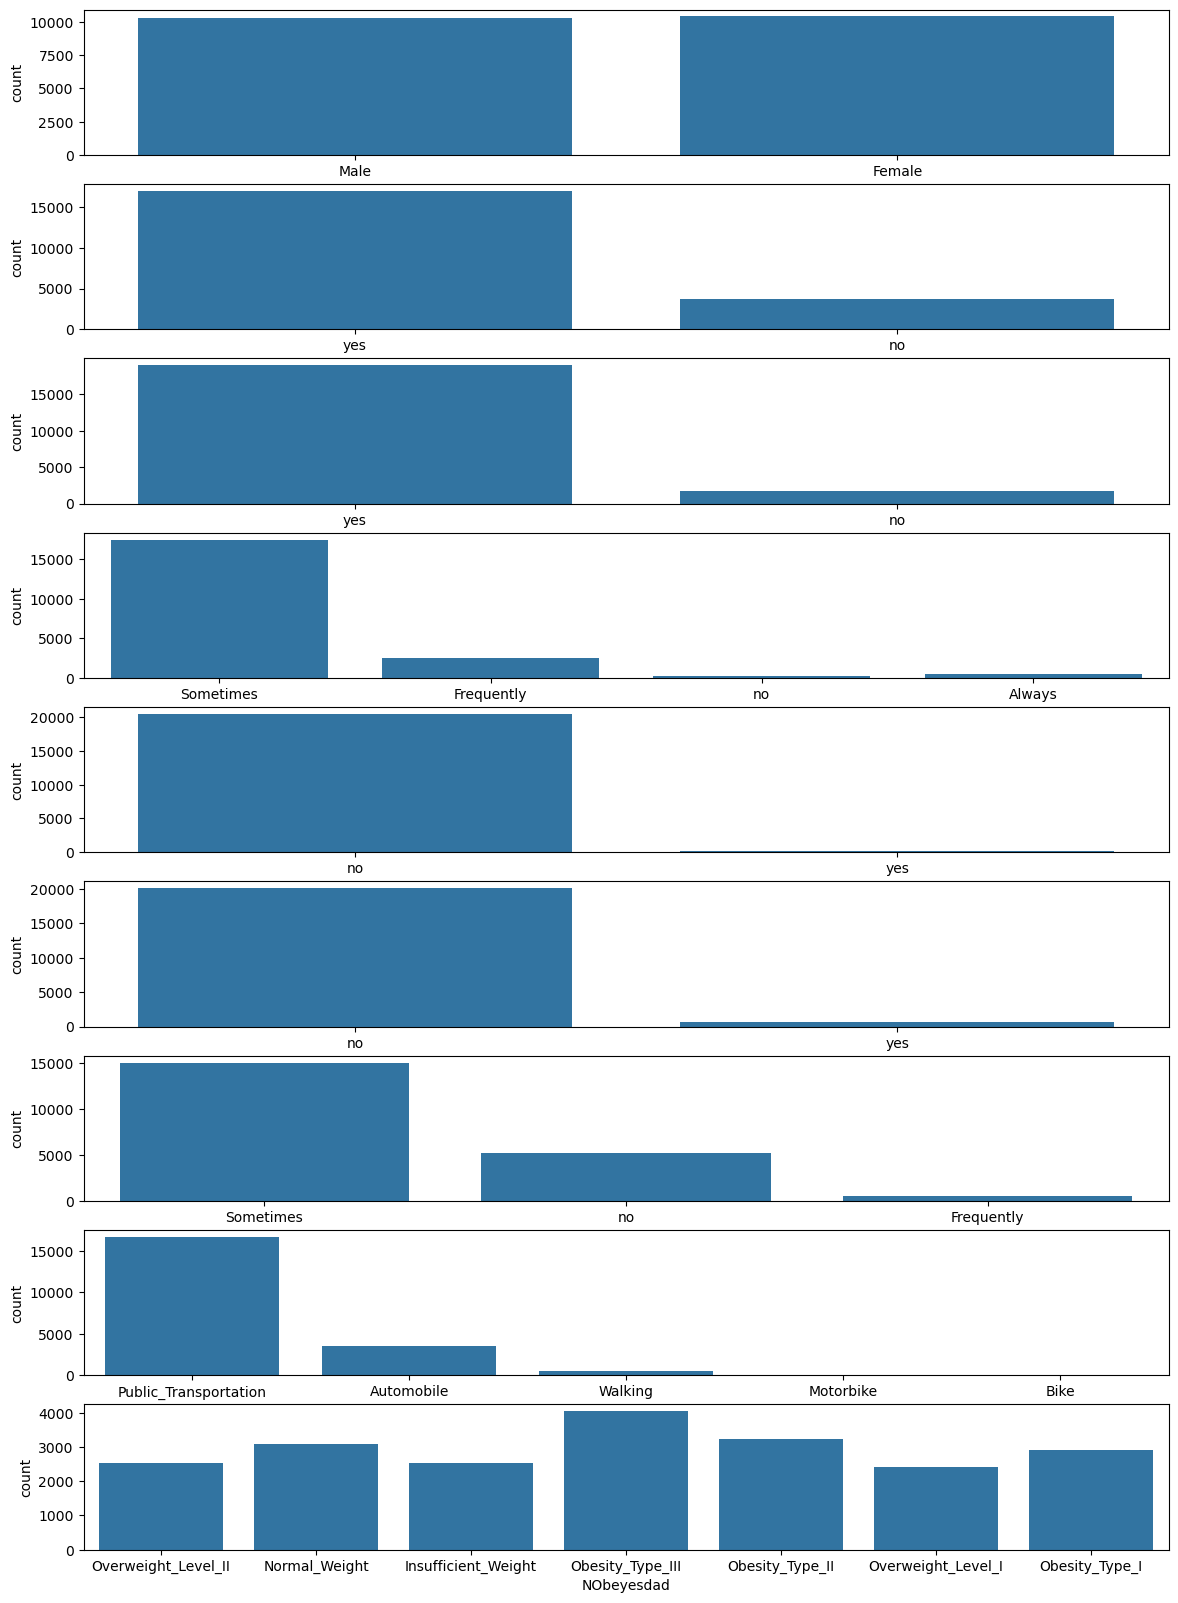

In [19]:
fig, ax = plt.subplots(nrows=len(categorial_columns), ncols=1, figsize=(14,20))
for i, column in enumerate(categorial_columns):
    sns.countplot(ax=ax[i], data=train_df, x=column);
    

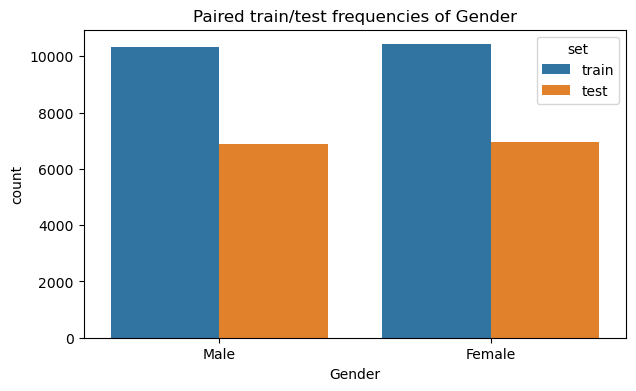

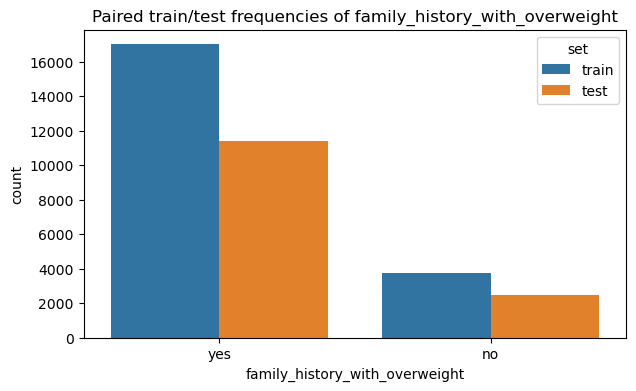

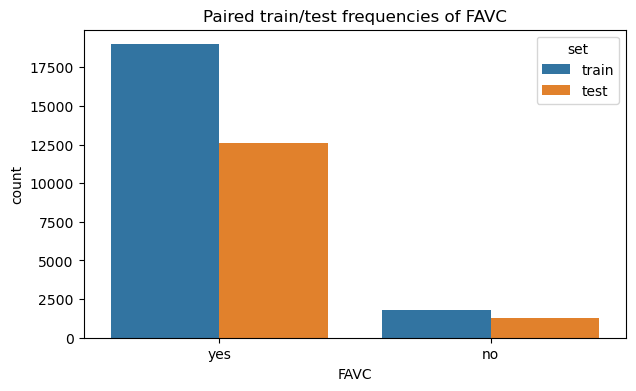

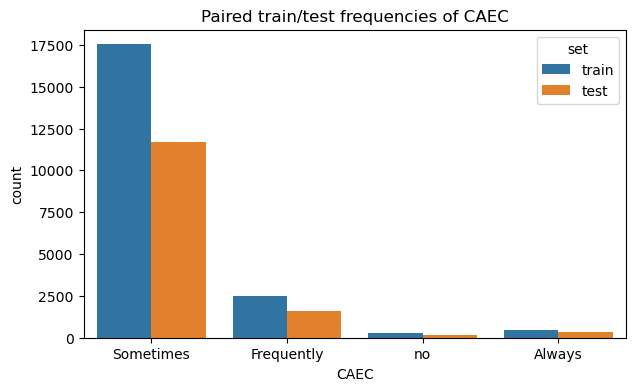

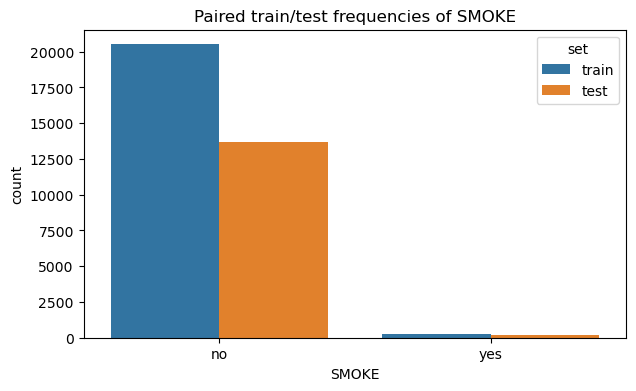

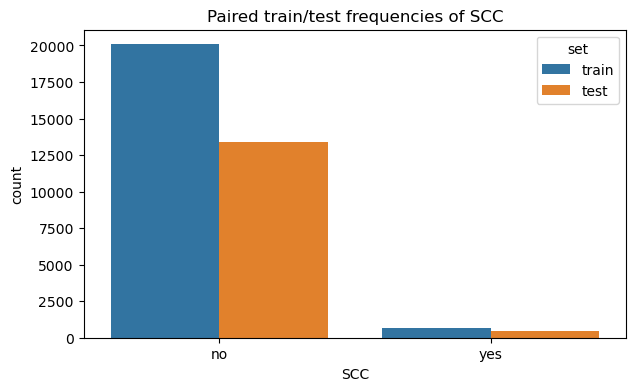

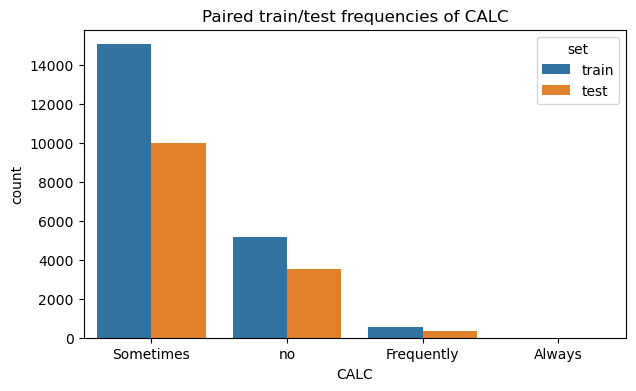

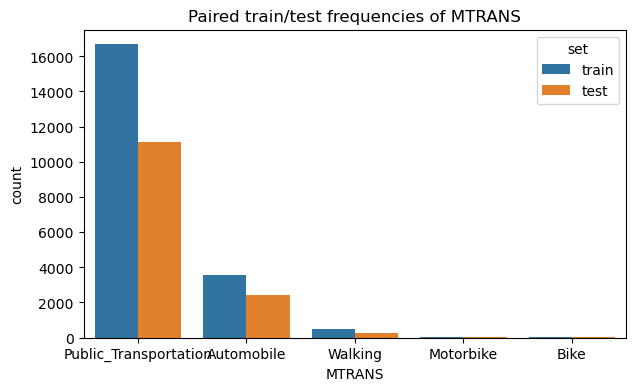

In [20]:
def plot_count_pairs(train, test, feature, hue="set"):
    df = train.copy()
    df["set"] = "train"
    df = pd.concat([df, test.copy()]).fillna("test")
    
    f, ax = plt.subplots(1, 1, figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue=hue)
    ax.set_title(f"Paired train/test frequencies of {feature}")

for feature in categorial_columns:
    if feature == "NObeyesdad": continue
    plot_count_pairs(train_df, test_df, feature)

### Взаимодействие признаков.

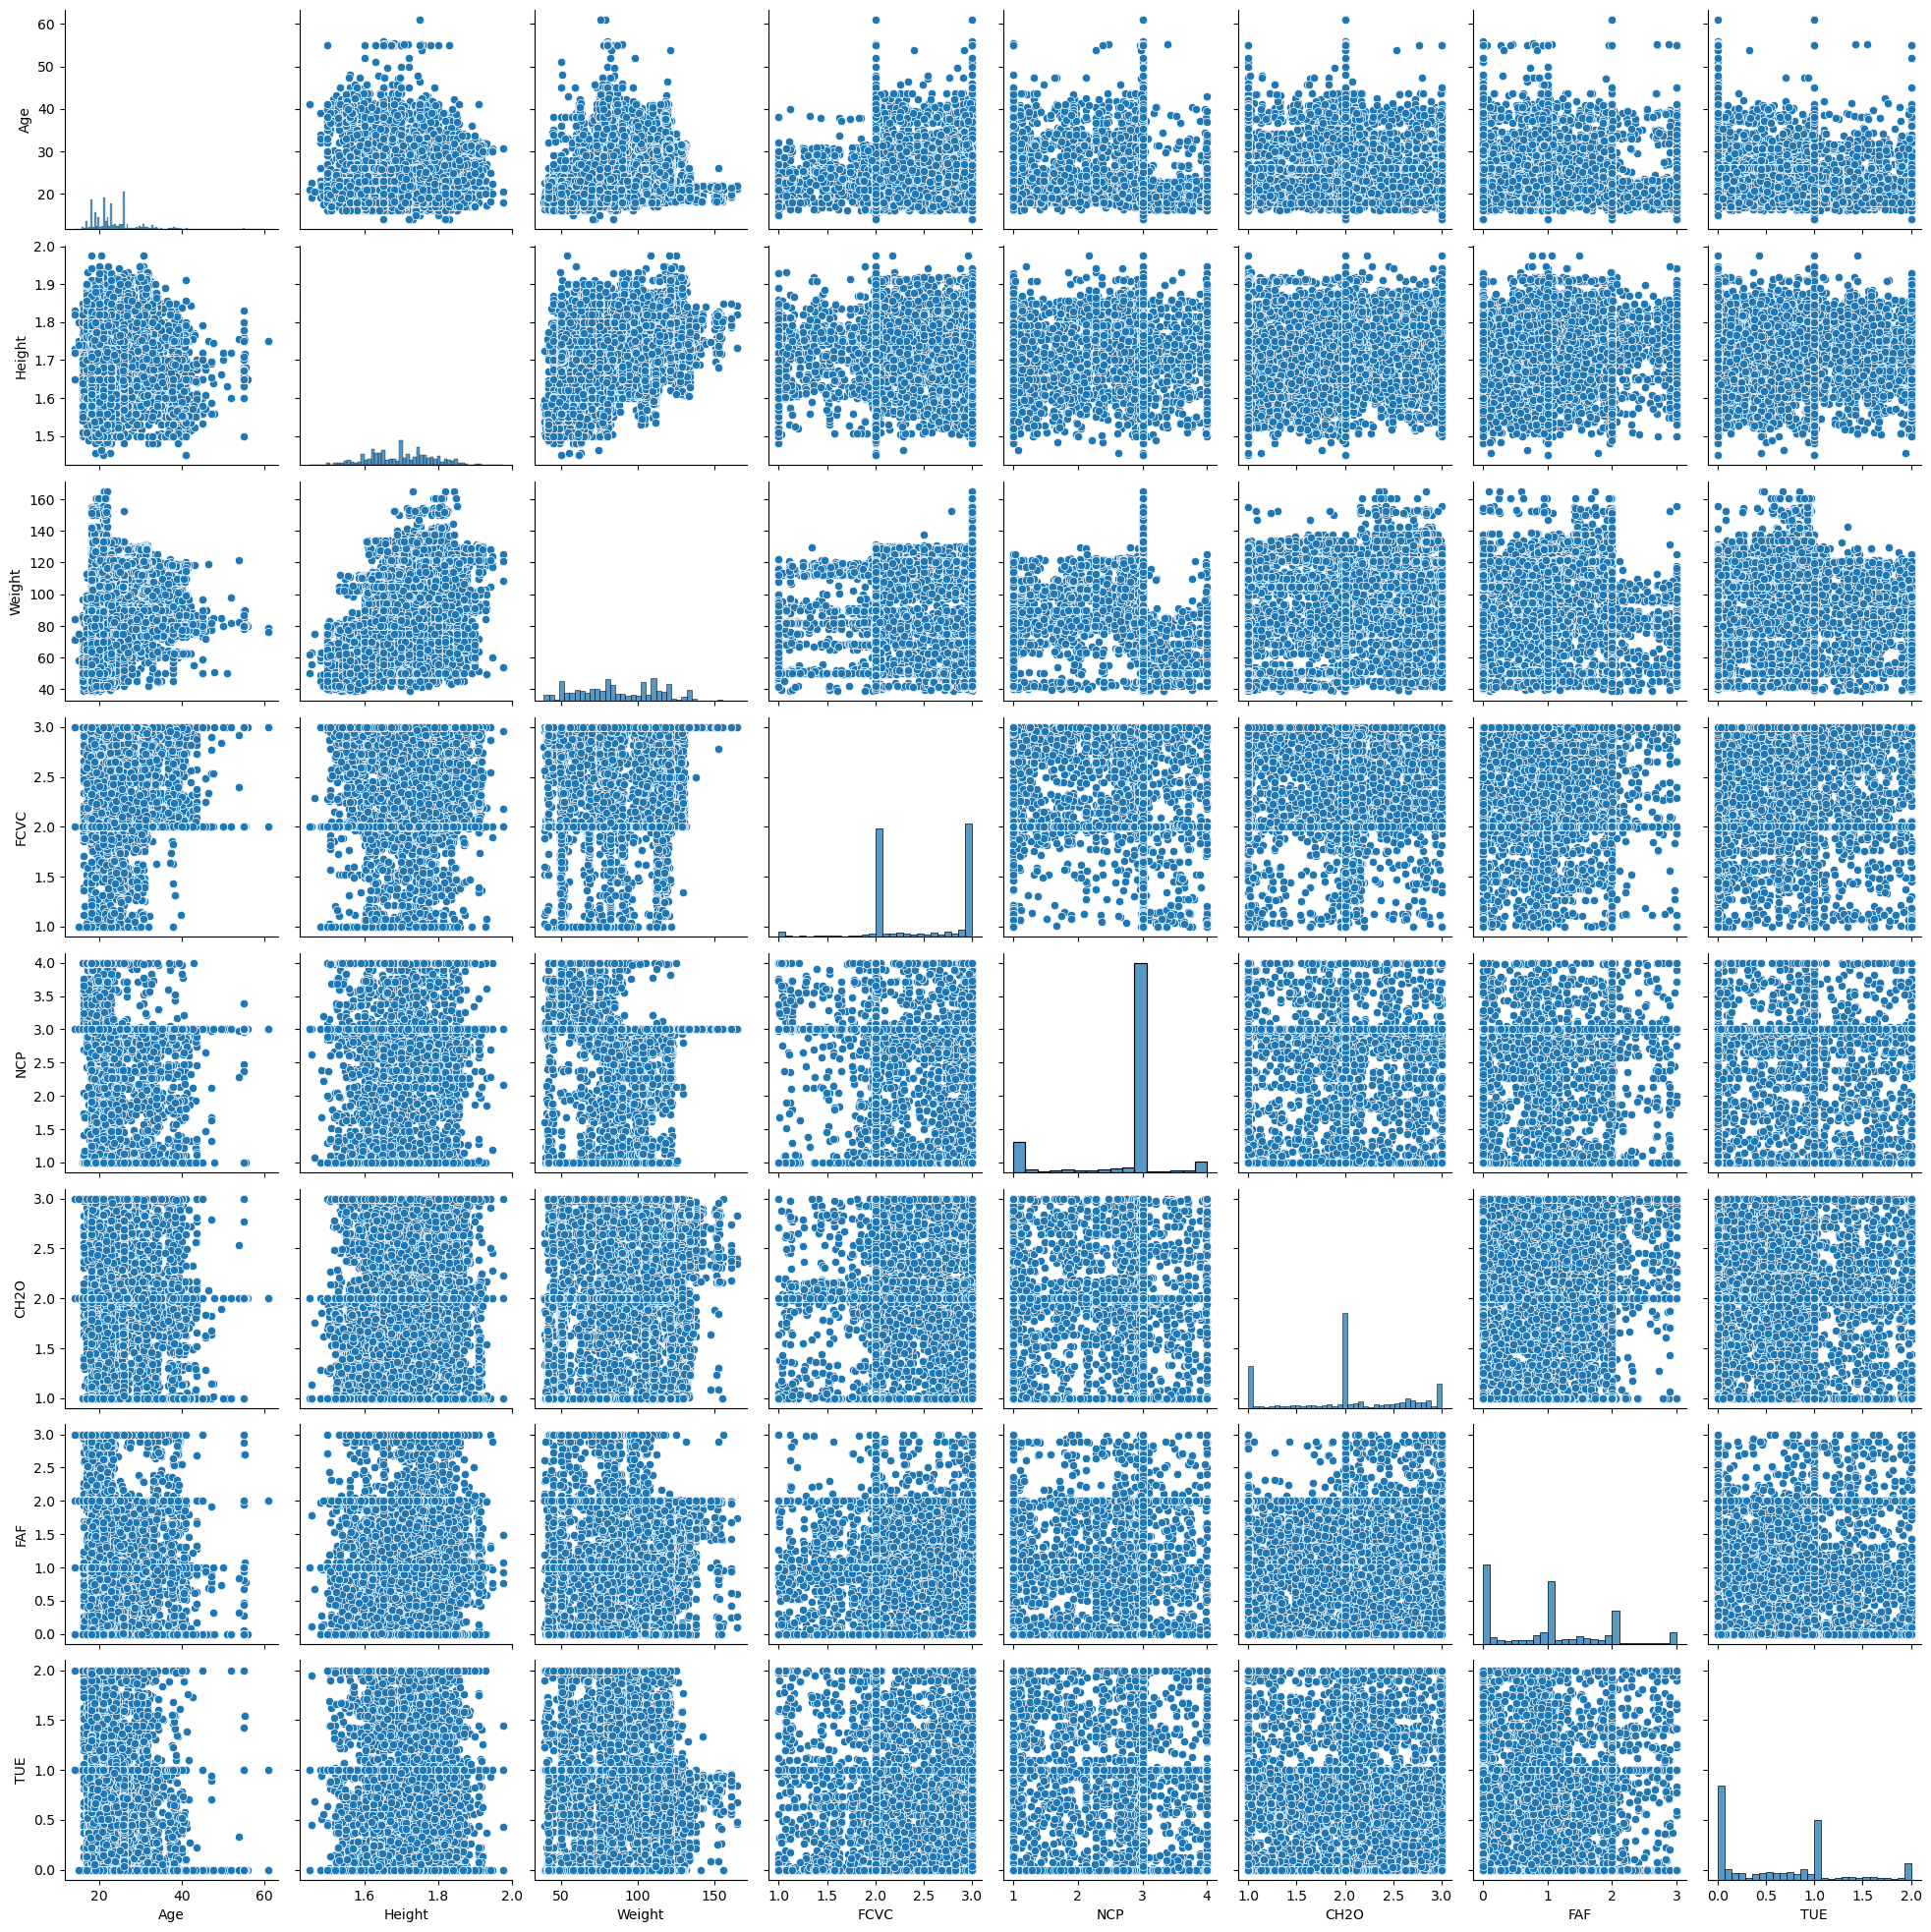

In [21]:
sns.pairplot(data=train_df)

##

## Data prepatation.

In [22]:
feature_dict = {
    "Gender": {
        'Female': 0,
        'Male': 1 
    },
    "family_history_with_overweight": {
        'no': 0,
        'yes': 1 
    },
    "FAVC": {
        'no': 0,
        'yes': 1 
    },
    "CAEC": {
        'no': 0, 
        'Sometimes': 1, 
        'Frequently': 2, 
        'Always': 3
    },
    "SMOKE": {
        'no': 0, 
        'yes': 1
    },
    "SCC": {
        'no': 0, 
        'yes': 1
    },
    "CALC": {
        'no': 0,
        'Sometimes': 1,
        'Frequently': 2,
        "Always": 3,
    },
}
obesity_dict = {label: numeric for numeric, label in enumerate(train_df['NObeyesdad'].unique())}
inverse_obesity_dict = {numeric: label for numeric, label in enumerate(train_df['NObeyesdad'].unique())}

In [23]:
train_df_pred = train_df.copy()
test_df_pred = test_df.copy()

In [24]:
for column in feature_dict.keys():
    train_df_pred[column] = train_df_pred[column].map(feature_dict[column])
    test_df_pred[column] = test_df_pred[column].map(feature_dict[column])
    

In [25]:
train_df_pred.head()


Gender        Age    Height      Weight  family_history_with_overweight  \
id                                                                            
0        1  24.443011  1.699998   81.669950                               1   
1        0  18.000000  1.560000   57.000000                               1   
2        0  18.000000  1.711460   50.165754                               1   
3        0  20.952737  1.710730  131.274851                               1   
4        1  31.641081  1.914186   93.798055                               1   

    FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
id                                                                             
0      1  2.000000  2.983297     1      0  2.763573    0  0.000000  0.976473   
1      1  2.000000  3.000000     2      0  2.000000    0  1.000000  1.000000   
2      1  1.880534  1.411685     1      0  1.910378    0  0.866045  1.673584   
3      1  3.000000  3.000000     1      0  1.674061    0  1.467863  0.780199   
4      1  2.679664  1.971472     1      0  1.979848    0  1.967973  0.931721   

    CALC                 MTRANS           NObeyesdad  
id                                                    
0      1  Public_Transportation  Overweight_Level_II  
1      0             Automobile        Normal_Weight  
2      0  Public_Transportation  Insufficient_Weight  
3      1  Public_Transportation     Obesity_Type_III  
4      1  Public_Transportation  Overweight_Level_II

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
columns_ohe = ['MTRANS']
    

In [28]:
temp = pd.get_dummies(train_df_pred['MTRANS']).astype('int32')
train_df_pred[temp.columns] = pd.get_dummies(train_df_pred['MTRANS']).astype('int32')

In [29]:
temp = pd.get_dummies(test_df_pred['MTRANS']).astype('int32')
test_df_pred[temp.columns] = pd.get_dummies(test_df_pred['MTRANS']).astype('int32')

In [30]:
test_df_pred = test_df_pred.drop(columns_ohe, axis=1)
train_df_pred = train_df_pred.drop(columns_ohe, axis=1)

### Первая стратегия - не преобразовываем наши данные.

#### XGboost

In [31]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, tpe, fmin, hp
import xgboost as xgb

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_df_pred.drop("NObeyesdad", axis=1), train_df_pred.NObeyesdad.map(obesity_dict), test_size=0.3, random_state=42)
X = train_df_pred.drop("NObeyesdad", axis=1).copy()
y = train_df_pred.NObeyesdad.map(obesity_dict).copy()

In [33]:
def fit_plot(model, X_train, y_train, X_val, y_val, verbose=100):
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=verbose)
    
    acc_train = accuracy_score(model.predict(X_train), y_train)
    acc_val = accuracy_score(model.predict(X_val), y_val)
    print(f"train_accuracy: {acc_train:.4f}\ntest_accuracy: {acc_val:.4f}")
    
    results = model.evals_result()
    val_mlogloss = results['validation_1']['mlogloss']
    best_epoch = min(val_mlogloss)
    i_best_epoch = val_mlogloss.index(best_epoch)
    print(f"Best mlogloss: {best_epoch}\nBest epoch: {i_best_epoch}")
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.plot(i_best_epoch, best_epoch, marker="o", color="green", label="Best")
    ax.legend()
    plt.xlabel("Epochs")
    plt.ylabel("M Log Loss")
    plt.title("M Log Loss developement while fitting")
    plt.show()

In [34]:
from xgboost import XGBClassifier

[0]	validation_0-mlogloss:1.74656	validation_1-mlogloss:1.74992


[100]	validation_0-mlogloss:0.19761	validation_1-mlogloss:0.27875
[200]	validation_0-mlogloss:0.12820	validation_1-mlogloss:0.27258
[237]	validation_0-mlogloss:0.11145	validation_1-mlogloss:0.27406
train_accuracy: 0.9575
test_accuracy: 0.9067
Best mlogloss: 0.2716432206333317
Best epoch: 187


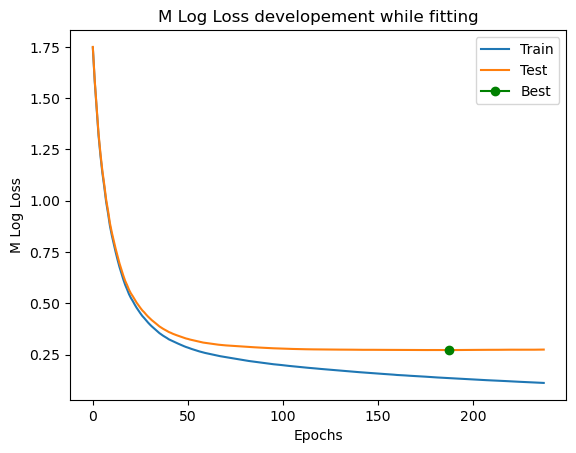

In [35]:
xgb_start = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    early_stopping_rounds=50,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    colsample_bytree=0.8,
    subsample=0.8,
    objective= 'multi:softprob',
    nthread=-1,
    random_state=42
)
fit_plot(xgb_start, X_train, y_train, X_test, y_test)

#### Подбор гиперпараметров

In [38]:
import optuna

In [40]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_child_weight = trial.suggest_float("min_child_weight", 0, 10)
    gamma = trial.suggest_float("gamma", 0, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    subsample = trial.suggest_float("subsample", 0, 1)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1)
    
    params = {
        "max_depth": max_depth,
        "min_child_weight": min_child_weight,
        "gamma": gamma,
        "colsample_bytree": colsample_bytree,
        "subsample": subsample,
        "reg_alpha": reg_alpha,
    }
    
    params["learning_rate"] = 0.1
    params["n_estimators"] = 200
    params["objective"] = "multi:softprob"
    params["nthread"] = -1
    params["random_state"] = 42
    
    model = XGBClassifier(**params)

    cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy')
    validation_score = np.mean(cv_results['test_score'])
    
    return validation_score

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)
df_study = study.trials_dataframe()
df_study_best = df_study.sort_values(by='value', ascending=False)
best_params = study.best_params
print(best_params)

[I 2024-02-11 21:37:59,783] A new study created in memory with name: no-name-96ffb042-3101-46ea-9ccb-73a8b768d451
[I 2024-02-11 21:38:05,764] Trial 0 finished with value: 0.9051932259515431 and parameters: {'max_depth': 4, 'min_child_weight': 9.50714306409916, 'gamma': 0.7319939418114051, 'colsample_bytree': 0.5986584841970366, 'subsample': 0.15601864044243652, 'reg_alpha': 0.15599452033620265}. Best is trial 0 with value: 0.9051932259515431.
[I 2024-02-11 21:38:10,105] Trial 1 finished with value: 0.8337508801881202 and parameters: {'max_depth': 1, 'min_child_weight': 8.661761457749352, 'gamma': 0.6011150117432088, 'colsample_bytree': 0.7080725777960455, 'subsample': 0.020584494295802447, 'reg_alpha': 0.9699098521619943}. Best is trial 0 with value: 0.9051932259515431.
[I 2024-02-11 21:38:21,328] Trial 2 finished with value: 0.8985452236826653 and parameters: {'max_depth': 9, 'min_child_weight': 2.1233911067827616, 'gamma': 0.18182496720710062, 'colsample_bytree': 0.18340450985343382,

{'max_depth': 10, 'min_child_weight': 6.74797067881778, 'gamma': 0.36872877272109744, 'colsample_bytree': 0.4266551603474428, 'subsample': 0.6690714931128591, 'reg_alpha': 0.038725199961182954}


In [46]:
best_params["objective"] = "multi:softprob"
best_params["early_stopping_rounds"] = 50
best_params["nthread"] = -1
best_params["random_state"] = 42

[0]	validation_0-mlogloss:1.77645	validation_1-mlogloss:1.78207
[100]	validation_0-mlogloss:0.19173	validation_1-mlogloss:0.28959
[200]	validation_0-mlogloss:0.14167	validation_1-mlogloss:0.26971
[275]	validation_0-mlogloss:0.12760	validation_1-mlogloss:0.27014
train_accuracy: 0.9584
test_accuracy: 0.9064
Best mlogloss: 0.26937852350509517
Best epoch: 226


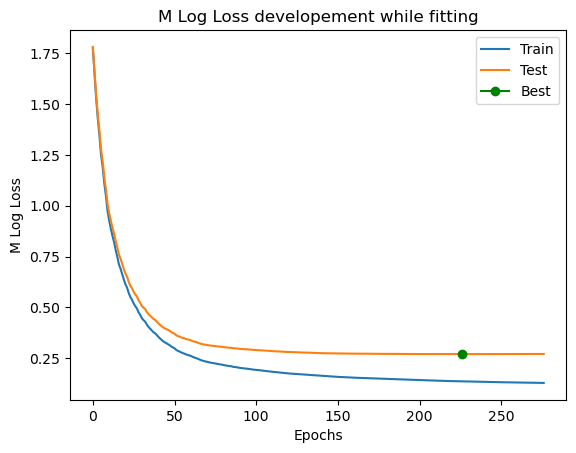

In [48]:
xgb_1 = XGBClassifier(
    **best_params,
    learning_rate=0.1,
    n_estimators=1000,
)
fit_plot(xgb_1, X_train, y_train, X_test, y_test)

In [49]:
best = xgb_1
predictions = best.predict(X_test)
predictions

array([3, 5, 6, ..., 2, 6, 2], dtype=int64)

In [ ]:
# answer = pd.DataFrame(data=np.array(pd.Series(xgboost_prediction).map(inverse_obesity_dict)), index=test_df_pred.index, columns=['NObeyesdad']) 
# answer.to_csv('benchmark5.csv')

